In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style
from sklearn.svm import SVC, LinearSVC


In [93]:
schedule = pd.read_csv(r'C:\Users\surfn\Desktop\FINAL_PROJECT\schedule.csv')

X = schedule.drop("Winner", axis=1)
y = schedule["Winner"].values.reshape(-1)
print(X.shape, y.shape)


(1020, 34) (1020,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardSca

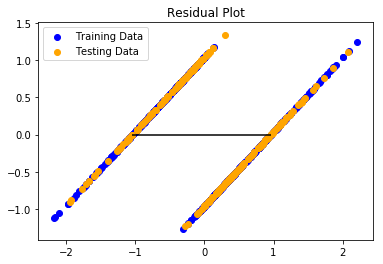

NameError: name 'score' is not defined

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
print(score)

In [20]:
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5966441683560562


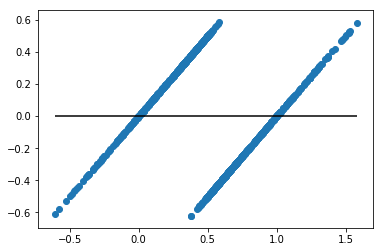

In [21]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [109]:
schedule = pd.read_csv(r'C:\Users\surfn\Desktop\FINAL_PROJECT\schedule.csv')

X = schedule.drop("Winner", axis=1)
y = schedule["Winner"].values.reshape(-1)
print(X.shape, y.shape)

model = SVC(kernel='linear')
model.fit(X, y)


(1020, 34) (1020,)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
# y = y.reshape(1020).shape

In [111]:
print(YY.ravel())

[ 0  1  2 ... 48 49 50]


In [117]:
x_min = X.iloc[:, 0].min()
x_max = X.iloc[:, 0].max()
y_min = X.iloc[:, 1].min()
y_max = X.iloc[:, 1].max()

print(x_min, x_max, y_min, y_max)

print(X.shape,y.shape,XX.shape,YY.shape)

0 57 0 51
(1020, 34) (1020,) (57, 51) (57, 51)


In [127]:
print(np.c_[XX.ravel(), YY.ravel()])

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [56 48]
 [56 49]
 [56 50]]


In [129]:

Z = model.decision_function(X)
print(Z)

ValueError: cannot reshape array of size 1020 into shape (57,51)

In [219]:
Z = Z.reshape(X,-1)


TypeError: 'DataFrame' object cannot be interpreted as an integer

In [206]:
from sklearn.ensemble import RandomForestClassifier

schedule = pd.read_csv(r'C:\Users\surfn\Desktop\FINAL_PROJECT\schedule.csv')

X = schedule.drop(["Winner", "home_finalscore", "away_finalscore"], axis=1)
y = schedule["Winner"].values.reshape(-1)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train)

(1020, 32) (1020,)
         H_PPG    H_PPGA     A_PPG    A_PPGA  H_Tempo_O  H_Pocket_time_O  \
432   27.58333  26.08333  22.83333  23.25000   6.583333            2.250   
1014  31.12500  22.06250  23.31250  23.68750   8.625000            2.375   
507   20.43750  18.43750  17.43750  24.75000  11.125000            2.063   
33    42.00000  16.33333  15.00000  31.00000   9.000000            2.333   
204   19.92308  22.38461  30.46154  19.00000  12.769230            2.154   
889   18.87500  18.50000  16.00000  16.87500   9.875000            2.500   
588   24.20000  21.80000  12.20000  16.80000   9.400000            2.000   
730   23.92857  19.42857  28.21428  19.35714   8.642858            2.286   
77    24.16667  23.16667  29.33333  20.33333  12.000000            2.500   
84    27.33333  16.83333  22.16667  26.83333   9.500000            2.333   
305   30.25000  25.50000  28.50000  31.75000   7.250000            2.000   
82    25.80000  15.00000  19.00000  22.00000   8.400000            2.

In [215]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.7176470588235294

In [218]:

# Actual class predictions
rf_predictions = rf.predict(X_test)
# Probabilities for each class
rf_probs = rf.predict_proba(X_test)[:, 1]

# rf_predictions
rf_probs


array([0.485, 0.315, 0.29 , 0.725, 0.125, 0.635, 0.41 , 0.2  , 0.56 ,
       0.48 , 0.58 , 0.125, 0.66 , 0.605, 0.495, 0.46 , 0.545, 0.53 ,
       0.69 , 0.5  , 0.575, 0.415, 0.31 , 0.295, 0.455, 0.575, 0.3  ,
       0.73 , 0.37 , 0.41 , 0.53 , 0.335, 0.255, 0.38 , 0.76 , 0.095,
       0.295, 0.605, 0.39 , 0.885, 0.76 , 0.575, 0.635, 0.38 , 0.54 ,
       0.655, 0.685, 0.74 , 0.605, 0.4  , 0.72 , 0.78 , 0.345, 0.585,
       0.705, 0.79 , 0.23 , 0.695, 0.34 , 0.4  , 0.48 , 0.645, 0.785,
       0.855, 0.95 , 0.655, 0.405, 0.565, 0.49 , 0.42 , 0.515, 0.42 ,
       0.565, 0.69 , 0.715, 0.635, 0.495, 0.29 , 0.32 , 0.555, 0.35 ,
       0.53 , 0.635, 0.54 , 0.41 , 0.13 , 0.525, 0.46 , 0.375, 0.425,
       0.495, 0.545, 0.44 , 0.405, 0.31 , 0.315, 0.2  , 0.73 , 0.53 ,
       0.895, 0.48 , 0.735, 0.285, 0.875, 0.57 , 0.33 , 0.465, 0.5  ,
       0.75 , 0.355, 0.305, 0.62 , 0.475, 0.385, 0.565, 0.155, 0.195,
       0.64 , 0.83 , 0.84 , 0.295, 0.53 , 0.405, 0.765, 0.43 , 0.915,
       0.92 , 0.38 ,

In [228]:
ds = pd.Series(rf_probs)
df = pd.DataFrame(ds)
df.to_csv(r'C:\Users\surfn\Desktop\FINAL_PROJECT\rf_probs.csv')

In [ ]:
plt.plot([x for x in range(2, len(X_train.iloc[0]))],score_list)

In [155]:
importances = rf.feature_importances_
importances

array([0.06635115, 0.07441523, 0.06385353, 0.08982611, 0.02374461,
       0.01667007, 0.02363247, 0.02420704, 0.02447519, 0.02516407,
       0.03572613, 0.02482507, 0.01718651, 0.02611165, 0.02249889,
       0.02802313, 0.02562466, 0.03062411, 0.02055463, 0.01543478,
       0.03277189, 0.02220187, 0.03176884, 0.02425812, 0.03351732,
       0.02301467, 0.01656864, 0.0340932 , 0.02241515, 0.02837205,
       0.02341446, 0.02865474])

In [156]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.08982611272694294, 'A_PPGA'),
 (0.07441522579364014, 'H_PPGA'),
 (0.0663511495490099, 'H_PPG'),
 (0.06385352953560043, 'A_PPG'),
 (0.035726131582017456, 'H_Rushing_yards_O'),
 (0.03409320059889118, 'A_Pass_Attempts_D'),
 (0.03351732495717364, 'H_Rushing_yards_D'),
 (0.03277189379491391, 'H_Pass_Attempts_D'),
 (0.03176884475158134, 'H_Air_Yards_D'),
 (0.030624114677758284, 'A_Rushing_yards_O'),
 (0.028654740969675872, 'A_Rushing_yards_D'),
 (0.02837205059935607, 'A_Air_Yards_D'),
 (0.028023132588753413, 'A_Air_Yards_O'),
 (0.026111650546991272, 'A_Pass_Attempts_O'),
 (0.025624656851247495, 'A_Pass_Yards_O'),
 (0.02516406514215505, 'H_Pass_Yards_O'),
 (0.02482506532357573, 'A_Tempo_O'),
 (0.0244751946643218, 'H_Air_Yards_O'),
 (0.024258120898479684, 'H_Pass_Yards_D'),
 (0.024207039236157038, 'H_Pass_Completions_O'),
 (0.023744612667760706, 'H_Tempo_O'),
 (0.023632469752546386, 'H_Pass_Attempts_O'),
 (0.02341446126206646, 'A_Pass_Yards_D'),
 (0.023014672717234088, 'A_Tempo_D'),
 (0.02

In [191]:
print(X_train.iloc[:,:2].values)
print(len(X_train.iloc[0]))

[[27.58333 26.08333]
 [31.125   22.0625 ]
 [20.4375  18.4375 ]
 ...
 [13.14286 25.85714]
 [17.16667 25.58333]
 [20.71428 23.14286]]
32


In [203]:
score_list = []

for a in range(2, len(X_train.iloc[0])):
    model = KNeighborsClassifier()
    model.fit(X_train.iloc[:,:a].values, y_train.reshape(-1,1))
    score = model.score(X_test.iloc[:,:a].values, y_test.reshape(-1,1))
    score_list.append(score)

    

    


# Fitting our model with all of our features in X


# print(f"R2 Score: {score}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversi

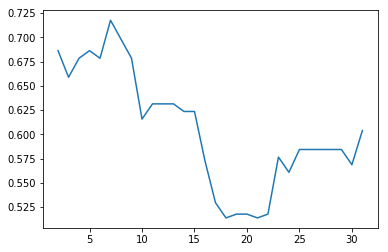

In [204]:
plt.plot([x for x in range(2, len(X_train.iloc[0]))],score_list)